In [2]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras import regularizers

import warnings
warnings.filterwarnings("ignore")

### Load MNIST Data

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Defining the model

In [5]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

2022-02-25 19:57:06.702618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-25 19:57:06.703499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 19:57:06.703977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-25 19:57:06.704200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-25 19:57:06.704391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Visualizing the model

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

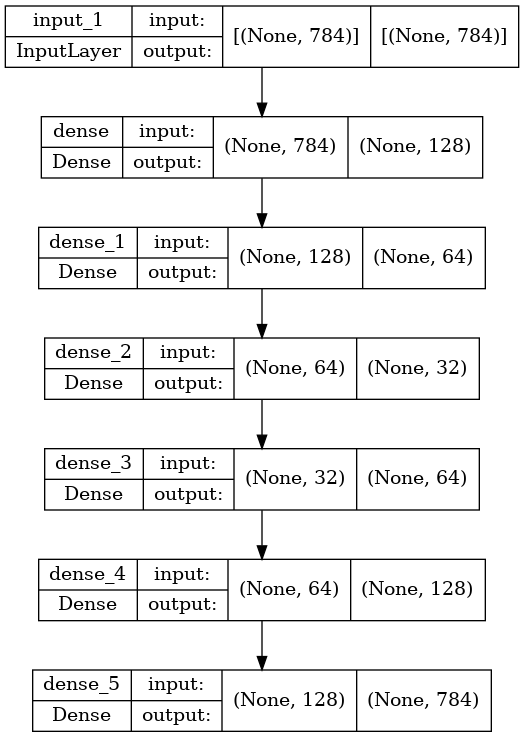

In [10]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(autoencoder, to_file=dot_img_file, show_shapes=True)

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

2022-02-25 20:00:26.780277: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-02-25 20:00:27.036762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
234/235 [============================>.] - ETA: 0s - loss: 0.2480

2022-02-25 20:00:38.186730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2022-02-25 20:00:38.239475: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


235/235 [==============================] - 12s 42ms/step - loss: 0.2479 - val_loss: 0.1654
Epoch 2/10
235/235 [==============================] - 9s 37ms/step - loss: 0.1483 - val_loss: 0.1332
Epoch 3/10
235/235 [==============================] - 9s 39ms/step - loss: 0.1284 - val_loss: 0.1214
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1194 - val_loss: 0.1145
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1134 - val_loss: 0.1097
Epoch 6/10
235/235 [==============================] - 9s 36ms/step - loss: 0.1089 - val_loss: 0.1063
Epoch 7/10
235/235 [==============================] - 9s 38ms/step - loss: 0.1055 - val_loss: 0.1028
Epoch 8/10
235/235 [==============================] - 8s 36ms/step - loss: 0.1028 - val_loss: 0.1016
Epoch 9/10
235/235 [==============================] - 9s 37ms/step - loss: 0.1008 - val_loss: 0.0995
Epoch 10/10
235/235 [==============================] - 9s 36ms/step - loss: 0.0992 - val_loss: 0.0976

In [14]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

2022-02-25 20:02:30.461220: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


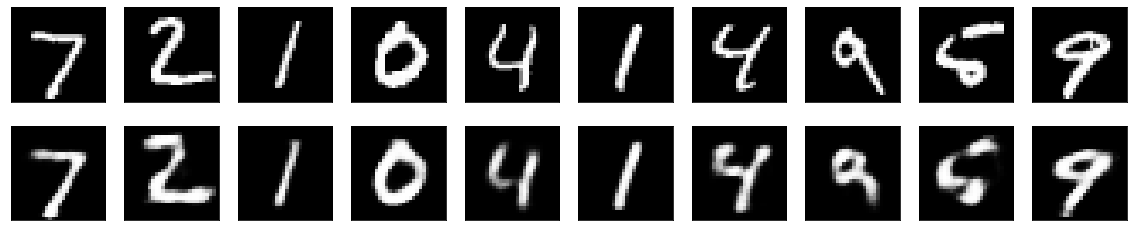

In [15]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()